# Notebook for ANNDL - Homework 2

Team: All Is Well

Team members: Fatma Hamila, Kodai Takigawa, Zheng Maria Yu

In [ ]:
!unzip /dataset.zip 

Archive:  /dataset.zip
caution: filename not matched:  /dataset


# Setup
Firstly, we need to setup the environment by importing the required libraries, setting the current path (eventually mounting Google Drive), and fixing the random seed for our experiments' reproducibility.

The dataset should be present in the same folder of this notebook.

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns

tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
use_drive = False

In [3]:
# Connect to Google Drive
# Set path

if(use_drive):
    from google.colab import drive
    drive.mount('/gdrive')
    path = "/gdrive/My Drive/ANNDL/2022-23/Homework2"
    %cd /gdrive/My Drive/ANNDL/2022-23/Homework2
else:
    path = os.getcwd()
    print(str(path))

/content


In [4]:
# Fix random seed for reproducibility
seed = 23

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [12]:
dataset_dir = ''

In [13]:
X_all_raw = np.load(os.path.join(dataset_dir, 'x_train.npy'))
y_all_raw = np.load(os.path.join(dataset_dir, 'y_train.npy'))

In [14]:
print(X_all_raw.shape,y_all_raw.shape)

(2429, 36, 6) (2429,)


In [16]:
max(y_all_raw),min(y_all_raw)

(11, 0)

# Data Analysis


In [17]:
mean_value=np.zeros((12,6))
std_value=np.zeros((12,6))
for i in range(12):
  for j in range(6):
    mean_value[i,j]=np.mean(X_all_raw[np.where(y_all_raw==i),:,j])
    std_value[i,j]=np.std(X_all_raw[np.where(y_all_raw==i),:,j])

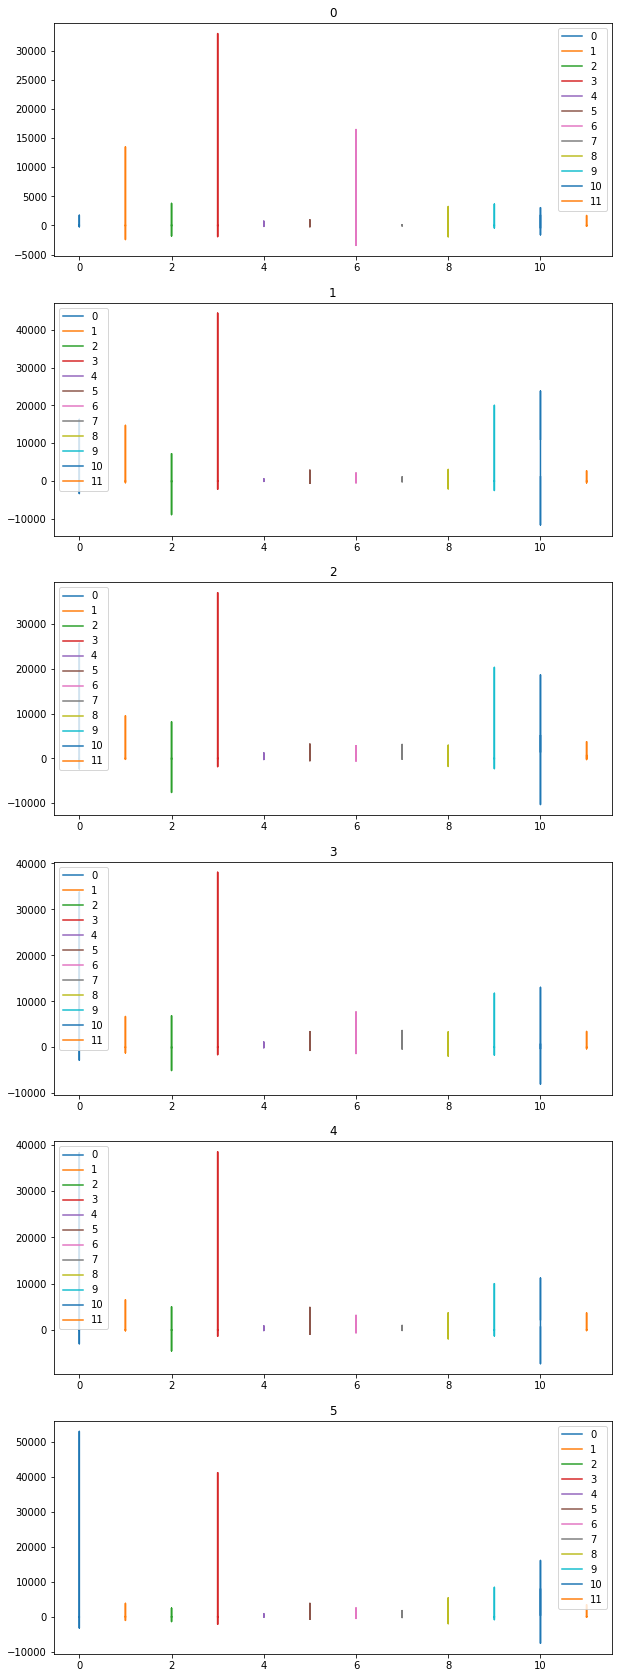

In [40]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(6,figsize=(10,30))
for i in range(6):
  for j in range(12):
    y=X_all_raw[np.where(y_all_raw==j),:,i].reshape(-1)
    x=[j]*len(y)
    axs[i].plot(x,y,label=str(j))
    axs[i].set_title(str(i))
    axs[i].legend()

plt.show()

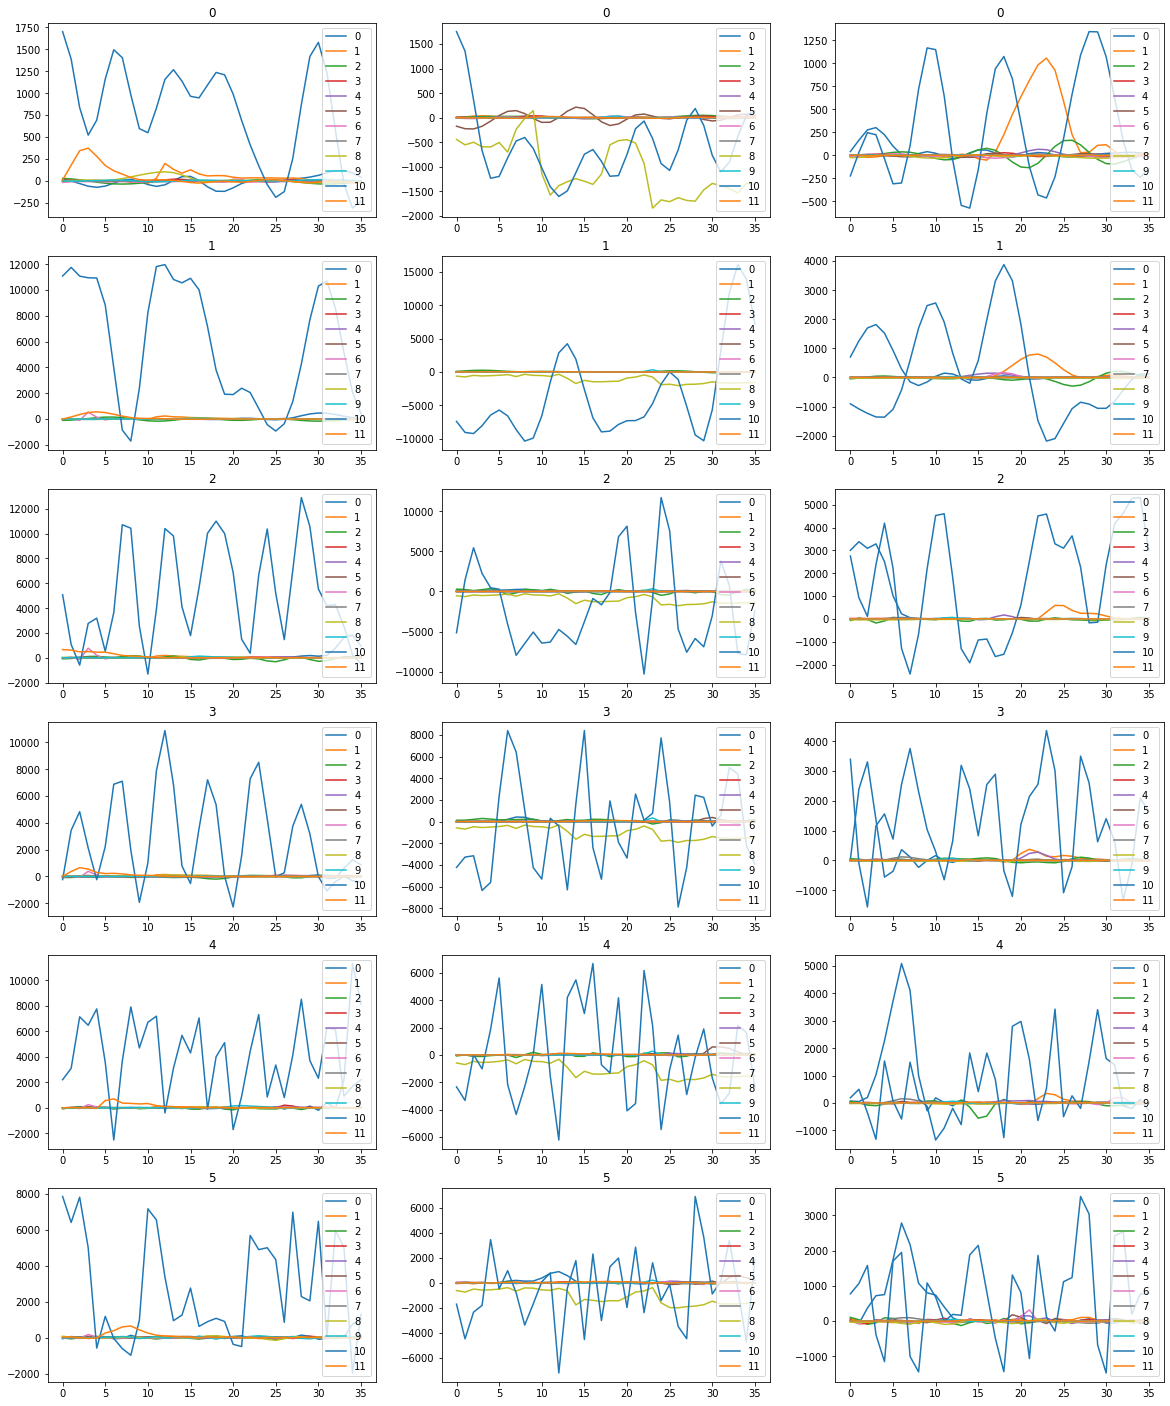

In [49]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(6,3,figsize=(20,25))
for i in range(6):
  for j in range(12):
    for index in range(3):
      y=X_all_raw[np.where(y_all_raw==j)[0][index],:,i]
      axs[i,index].plot(y,label=str(j))
      axs[i,index].set_title(str(i))
      axs[i,index].legend()
plt.show()